## Checking latitue and longitude
By : Vaishakhi Mayya, Marc Intrater, Armand Hoxha

We checked whether the Latitude and Longitude generated synthetically would provide correct contextual information on the country that it should belong to. Our findings indicate that the synthetic data generated using Gretel do not actually generate correct information.


Edit: John synthetic dataset (that was posted by Caitlyn in the Slack channel) actually does generate data that seems to match the location of longitude,latitude with the location of the actual country.

In [212]:
# importing libraries and data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import seaborn as sns

synth=pd.read_csv('./covid-data-synthetic.csv')
seed=pd.read_csv('./latestdata.csv')

/home/juggernaut-base/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (1,2,9,10,12,13,14,15,16,17,19,20,21,22,23,24,25,26,27,31,32) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [51]:
#synth['date_confirmation']=pd.to_datetime(synth['date_confirmation'])
synth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22225 entries, 0 to 22224
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   longitude                22225 non-null  float64
 1   latitude                 22225 non-null  float64
 2   country                  22225 non-null  object 
 3   chronic_disease_binary   22224 non-null  object 
 4   date_confirmation        21310 non-null  object 
 5   travel_history_binary    21811 non-null  object 
 6   province                 18445 non-null  object 
 7   city                     14053 non-null  object 
 8   age                      4954 non-null   object 
 9   sex                      4988 non-null   object 
 10  outcome                  2583 non-null   object 
 11  date_onset_symptoms      2203 non-null   object 
 12  date_admission_hospital  1026 non-null   object 
dtypes: float64(2), object(11)
memory usage: 2.2+ MB


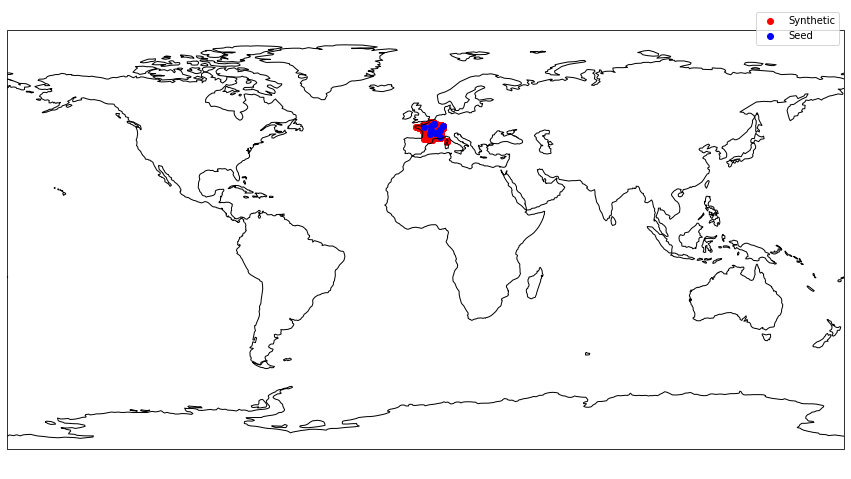

In [13]:
# essentially change only the country to see the results
country='France'

ax=plt.figure(figsize=(15,15))
ax=plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

synth_c=synth[synth['country']==country]
seed_c=seed[seed['country']==country].sample(synth_c.shape[1])

plt.scatter(synth_c['longitude'],synth_c['latitude'],color='red')
plt.scatter(seed_c['longitude'],seed_c['latitude'],color='blue')

plt.xlim(-180,180)
plt.ylim(-100,100)
plt.legend(['Synthetic','Seed'])


#plt.show()

# if you want to save the figure disable plt.show
#plt.savefig(country+'.png')

## Representation of the countries in the synthetic and seed data

In [88]:
seed_country_counts=seed.groupby('country')['ID'].count().sort_values(ascending=False)/seed.shape[0]
seed_country_counts=seed_country_counts.to_frame()
seed_country_counts.columns=['seed_counts']

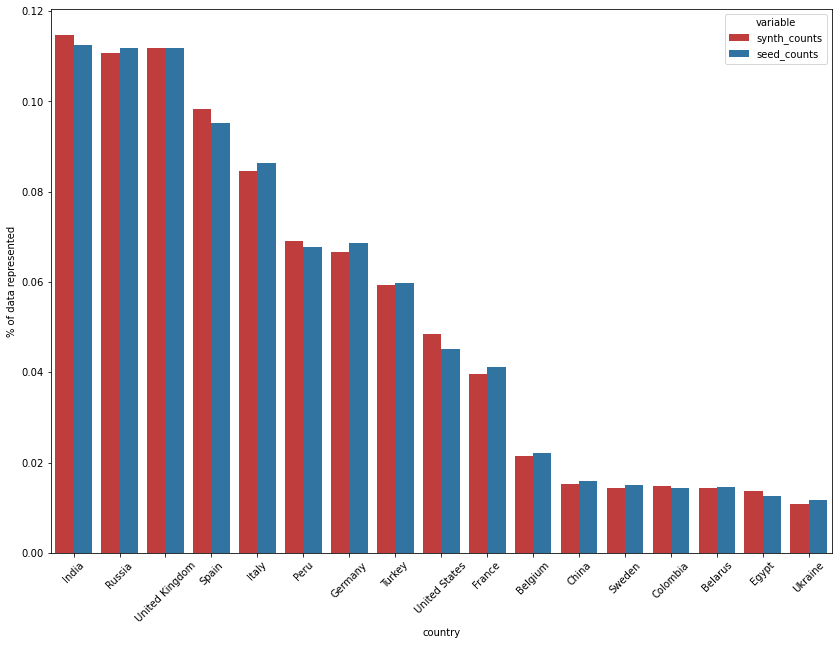

In [184]:
synth_country_counts=synth.groupby('country')['latitude'].count().sort_values(ascending=False)/synth.shape[0]
synth_country_counts=synth_country_counts.to_frame()
synth_country_counts.columns=['synth_counts']
joined=synth_country_counts.join(seed_country_counts,on='country',how='left')
joined=joined.reset_index()
melted=pd.melt(joined,id_vars='country',value_vars=['synth_counts','seed_counts'])
melted=melted.sort_values(by='value',ascending=False)
melted_select=melted.loc[0:16]
f=plt.figure(figsize=(14,10))
barplot=sns.barplot(x='country',y='value',hue='variable',data=melted_select,palette=['C3','C0'])
plt.ylabel('% of data represented')
for item in barplot.get_xticklabels():
    item.set_rotation(45)

## Distribution of Age

In [169]:
def agerange2num(r):
    try:
        if type(r)==str:
            if r =='':
                return r
            if 'weeks' in r:
                return '0'
            if '+' in r:
                return r[0:1]
            if ('month' in r) or ('months' in r):
                return '1'
            if '-' in r:
                p=r.split('-')
                if len(p)==2:
                    return p[0]
                #print(p)
                return str(int(int(p[0])+(int(p[1])-int(p[0]))/2))
            else:
                return r
        else:
            return r
    except:
        return r

In [171]:
# get rid of ranges get the mean of those ranges
tmp_synth_ages=synth['age'].apply(agerange2num)
tmp_seed_ages=seed['age'].apply(agerange2num)
tmp_synth_ages=tmp_synth_ages.dropna()
tmp_seed_ages=tmp_seed_ages.dropna()
tmp_seed_ages=tmp_seed_ages.astype(float)
tmp_synth_ages=tmp_synth_ages.astype(float)

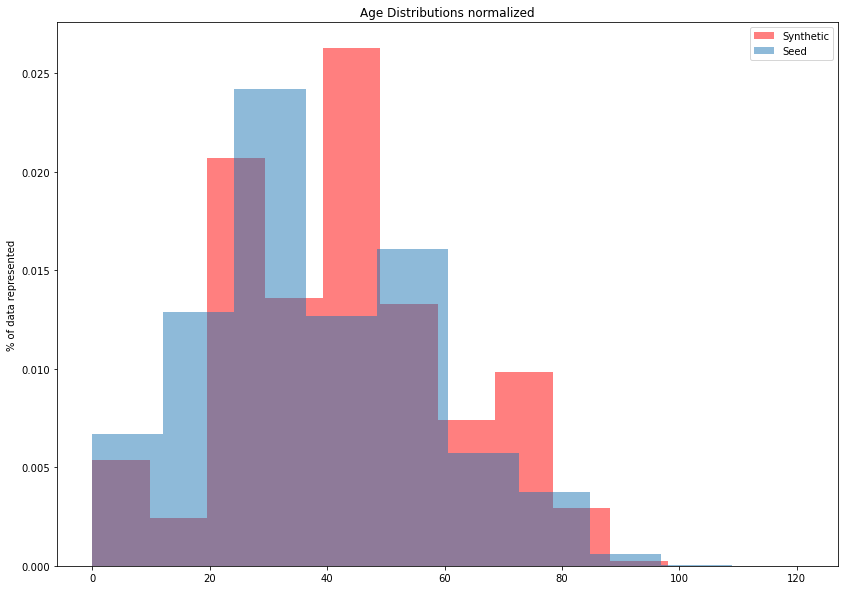

In [178]:
f=plt.figure(figsize=(14,10))
histplot=plt.hist(x=tmp_synth_ages,bins=10,density=True,color='red',alpha=0.5)
plt.ylabel('% of data represented')
histplot=plt.hist(x=tmp_seed_ages,bins=10,density=True,alpha=0.5)
plt.title('Age Distributions normalized')
plt.legend(['Synthetic','Seed'])

## Recorded Outcome

In [187]:
synth['outcome'].unique()

array([nan, 'Recovered', 'Hospitalized', 'recovered', 'Deceased'],
      dtype=object)

In [188]:
seed['outcome'].unique()

array(['critical condition, intubated as of 14.02.2020', 'death',
       'discharge', nan, 'discharged', 'Discharged',
       'Discharged from hospital', 'not hospitalized', 'recovered',
       'recovering at home 03.03.2020', 'released from quarantine',
       'severe', 'stable', 'died', 'Death', 'dead',
       'Symptoms only improved with cough. Currently hospitalized for follow-up.',
       'treated in an intensive care unit (14.02.2020)', 'Alive', 'Dead',
       'Recovered', 'Stable', 'Died', 'Deceased', 'stable condition',
       'Under treatment', 'Critical condition', 'Receiving Treatment',
       'severe illness', 'unstable', 'critical condition', 'Hospitalized',
       'Migrated', 'Migrated_Other',
       'https://www.mspbs.gov.py/covid-19.php'], dtype=object)

## Chronic Disease

In [202]:
synth.groupby('chronic_disease_binary')['longitude'].count()

chronic_disease_binary
False    22224
Name: longitude, dtype: int64

In [201]:
seed.groupby('chronic_disease_binary')['ID'].count()

chronic_disease_binary
False    2676124
True         187
Name: ID, dtype: int64

There are no True Values in the synthetic dataset.

## Gender

In [207]:
synth['sex'].unique()

array([nan, 'male', 'female'], dtype=object)

In [208]:
seed['sex'].unique()

array(['male', 'female', nan], dtype=object)

In [236]:
syn_genders=synth.dropna(subset=['sex']).groupby('sex')['longitude'].count().to_frame().reset_index()
syn_genders.columns=['gender','syn_gender']
syn_genders['syn_gender']=syn_genders['syn_gender']/synth.shape[0]

seed_genders=seed.dropna(subset=['sex']).groupby('sex')['longitude'].count().to_frame().reset_index()
seed_genders.columns=['gender','seed_gender']
seed_genders['seed_gender']=seed_genders['seed_gender']/seed.shape[0]

joined=pd.concat([syn_genders,seed_genders])
joined.head()

,gender,syn_gender,seed_gender
0,female,0.089764,NaN
1,male,0.134668,NaN
0,female,NaN,0.101994
1,male,NaN,0.114780


Text(0, 0.5, '% of gender representation')

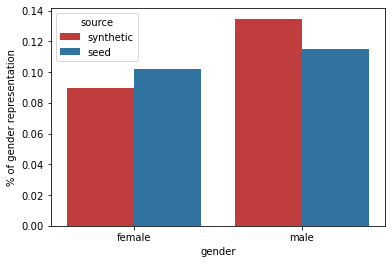

In [238]:
joined.columns=['gender','source','value']
joined['source']=['synthetic','synthetic','seed','seed']
joined['value'] = [0.089764, 0.134668, 0.101994, 0.114780]
sns.barplot(x='gender',y='value',hue='source',data=joined, palette=['C3','C0'])
plt.ylabel('% of gender representation')

In [204]:
seed.groupby('sex')['ID'].count()

sex
female    272969
male      307188
Name: ID, dtype: int64